In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from model import NN

In [2]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

Test = datasets.ImageFolder(root='archive/test', transform=transform)
Test_loader = DataLoader(Test, shuffle=True)

In [3]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
model   = NN().to(device)
model.load_state_dict(torch.load('weights.pth'))
lossFunc = torch.nn.CrossEntropyLoss()

Guess: happy;  Answer: neutral


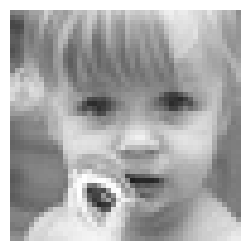

Guess: fear;  Answer: fear


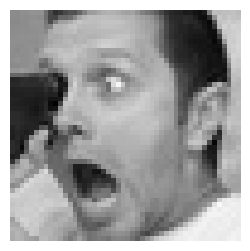

Guess: neutral;  Answer: neutral


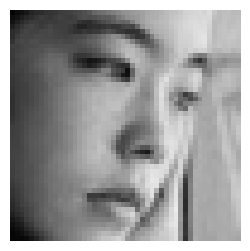

Guess: surprise;  Answer: surprise


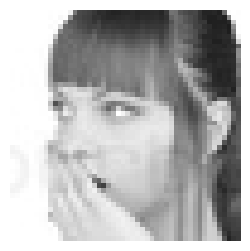

Guess: fear;  Answer: fear


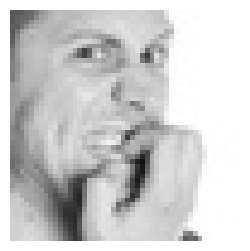

angry: 474/467
disgust: 29/56
fear: 436/496
happy: 725/895
neutral: 767/607
sad: 743/653
surprise: 415/415
Accuracy 2041/3589 = 0.569


In [5]:
model.eval()

five = 1
N = n = 0

guesses = [0] * 7
answers = [0] * 7
with torch.no_grad():
    for img, label in Test_loader:
        logit = model(img)
        guess = logit.argmax(dim=1).item()
        img = img.squeeze([0,1])

        if guess == label.item():
            n += 1
        N += 1
        
        guesses[guess] += 1
        answers[label.item()] += 1
        
        # print random examples
        if five <= 5 and np.random.rand() > 0.99:
            five += 1
            print(f"Guess: {Test_loader.dataset.classes[guess]};  Answer: {Test_loader.dataset.classes[label.item()]}")
            # un-normalize in-place
            img_unnorm = img * 0.5 + 0.5
            np_img = img_unnorm.squeeze().cpu().numpy()
            plt.figure(figsize=(3,3))
            plt.imshow(np_img, cmap='gray', vmin=0, vmax=1)
            plt.axis('off')
            plt.show()
for i in range(7):
    print(f"{Test_loader.dataset.classes[i]}: {guesses[i]}/{answers[i]}")
print(f"Accuracy {n}/{N} = {n/N:0.3f}")